<a href="https://colab.research.google.com/github/carolincenteno0903-commits/Final-Project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis on Sleep Health and Lifestyle Dataset

# Name: Carol Centeno

### Background:

### This dataset shows the relationship between lifestyle choices and their effects on overall sleep health. It includes detailed information on people's physological factors, lifestyle choices, and sleep health, including blood pressure, heart rate, physical activity, body mass index (BMI), daily steps, stress levels, sleep duration, sleep quality, and the presence of sleep disorder.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

In [4]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [6]:
# Data Cleaning

# Check for missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nDuplicate rows before cleaning:")
print(df.duplicated().sum())

Missing values before cleaning:
Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

Duplicate rows before cleaning:
0


In [8]:
# Data Cleaning

# Fill missing values in 'Sleep Disorder' with 'Unknown'
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('Unknown')

# Verify that missing values have been handled
print("\nMissing values after handling 'Sleep Disorder':")
print(df.isnull().sum())


Missing values after handling 'Sleep Disorder':
Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64


In [18]:
# Data Manipulation

# Grouping by 'Sleep Disorder'
# We group by 'Sleep Disorder' to understand the frequency of each sleep disorder in the dataset.
# This is useful for analyzing the prevalence of different disorders and for creating visualizations.
sleep_disorder_counts = df.groupby('Sleep Disorder').size().reset_index(name='Count')
print("Count of each Sleep Disorder:")
display(sleep_disorder_counts)


Count of each Sleep Disorder:


,Sleep Disorder,Count
0,Insomnia,77
1,Sleep Apnea,78
2,Unknown,219


In [17]:
# Data Manipulation

# Filtering by 'BMI Category'
# We can filter the data to analyze specific subgroups based on their BMI.
# For example, let's filter for individuals in the 'Overweight' BMI category.
# This allows for focused analysis on the characteristics and health metrics of this specific group.
overweight_df = df[df['BMI Category'] == 'Overweight'].copy()
print("\nData filtered for 'Overweight' BMI Category:")
display(overweight_df.head())


Data filtered for 'Overweight' BMI Category:


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,Unknown
68,69,Female,33,Scientist,6.2,6,50,6,Overweight,128/85,76,5500,Unknown
69,70,Female,33,Scientist,6.2,6,50,6,Overweight,128/85,76,5500,Unknown
80,81,Female,34,Scientist,5.8,4,32,8,Overweight,131/86,81,5200,Sleep Apnea
81,82,Female,34,Scientist,5.8,4,32,8,Overweight,131/86,81,5200,Sleep Apnea


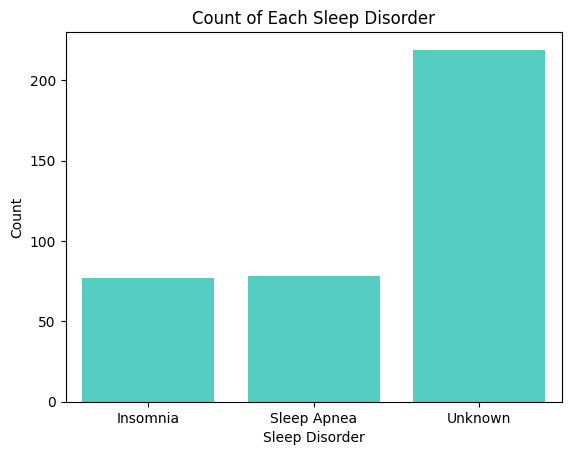

In [22]:
# Data Visualization

# Bar Chart of Sleep Disorder Counts

sns.barplot(x='Sleep Disorder', y='Count', data=sleep_disorder_counts, color = 'turquoise')
plt.title('Count of Each Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Count')
plt.show()

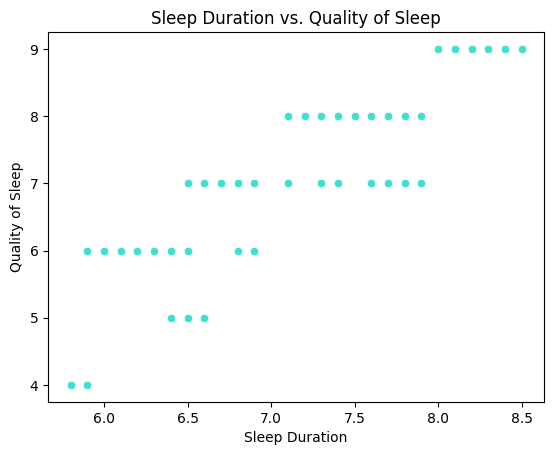

In [26]:
# Data Visualization

# Scatter Plot of Sleep Duration vs. Quality of Sleep
sns.scatterplot(x='Sleep Duration', y='Quality of Sleep', data=df, color = 'turquoise')
plt.title('Sleep Duration vs. Quality of Sleep')
plt.xlabel('Sleep Duration')
plt.ylabel('Quality of Sleep')
plt.show()

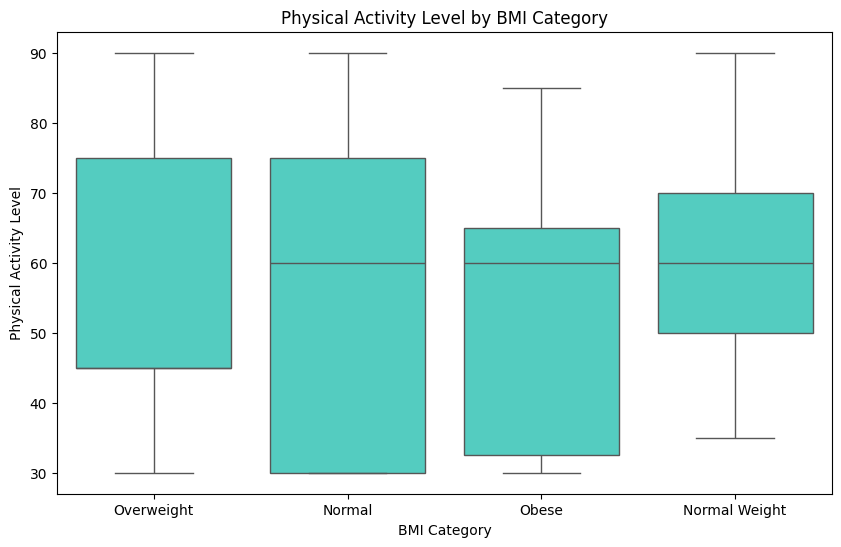

In [27]:
# Data Visualization

# 3. Box Plot of Physical Activity Level by BMI Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='BMI Category', y='Physical Activity Level', data=df, color = 'turquoise')
plt.title('Physical Activity Level by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Physical Activity Level')
plt.show()

In [30]:
# Statistical Analysis - Correlation Analysis

# Select only numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numerical_cols].corr()

# Display the correlation matrix
print("\nCorrelation Matrix for Numerical Columns:")
display(correlation_matrix)


Correlation Matrix for Numerical Columns:


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Person ID,1.000000,0.990516,0.296305,0.431612,0.149882,-0.394287,-0.225467,0.043844
Age,0.990516,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973
Sleep Duration,0.296305,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533
Quality of Sleep,0.431612,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791
Physical Activity Level,0.149882,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723
Stress Level,-0.394287,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829
Heart Rate,-0.225467,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309
Daily Steps,0.043844,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000


Based on the correlation matrix:

Strong Positive Correlation:

*   Sleep Duration and Quality of Sleep have a strong positive correlation (around
0.88). This suggests that as sleep duration increases, the quality of sleep also tends to increase.
*   Physical Activity Level and Daily Steps have a strong positive correlation (around 0.77). This is expected, as more physical activity often means more daily steps

Strong Negative Correlation:

*   Sleep Duration and Stress Level have a strong negative correlation (around -0.81). This indicates that as sleep duration increases, stress level tends to decrease.
*   Quality of Sleep and Stress Level have a strong negative correlation (around -0.89). This suggests that higher quality of sleep is associated with lower stress levels.

*    Quality of Sleep and Heart Rate have a moderately strong negative correlation (around -0.66). This implies that better sleep quality is associated with a lower heart rate.

Moderate Positive Correlation:

*   Stress Level and Heart Rate have a moderate positive correlation (around 0.67). Higher stress levels are associated with a higher heart rate.













###Citation: Google Gemini